<a href="https://colab.research.google.com/github/mohmaed7777/Ames-Housing-prediction-with-linear-regression-/blob/main/Linear_Regression_Classifier_for_Ames_Houses_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Description:**
**Iowa Housing Data:**


The original Ames data that is being used for the competition House Prices: Advanced Regression Techniques and predicting sales price is edited and engineered to suit a beginner for applying a model without worrying too much about missing data while focusing on the features.

**Contents:**
The train data has the shape 1460x80 and test data has the shape 1458x79 with feature 'SalePrice' to be predicted for the test set.
The train data has different types of features, categorical and numerical.

A detailed info about the data can be obtained from the Data Description file among other data files.

**Transformations:**


**a. Handling Missing Values:**


Some variables such as 'PoolQC', 'MiscFeature', 'Alley' have over 90% missing values. However from the data description, it is implied that the missing value indicates the absence of such features in a particular house. Well, most of the missing data implies the feature does not exist for the particular house on further inspection of the dataset and data description.

Similarly, features which are missing such as 'GarageType', 'GarageYrBuilt', 'BsmtExposure', etc indicated no garage in that house but also corresponding attributes such as 'GarageCars', 'GarageArea','BsmtCond' etc are set to 0.

A house on a street might have similar front lawn area to the houses in the same neighborhood, hence the missing values can be median of the values in a neighborhood.

Missing values in features such as 'SaleType', 'KitchenCond', etc have been imputed with the mode of the feature.

**b. Dropping Variables:**


'Utilities' attribute should be dropped from the data frame because almost all the houses have all public Utilities (E,G,W,& S) available.

**c. Further exploration:**


The feature 'Electrical' has one missing value. The first intuition would be to drop the row. But on further inspection, the missing value is from a house built in 2006. After the 1970's all the houses have Standard Circuit Breakers & Romex 'SkBrkr' installed. So, the value can be inferred from this observation.

**d. Transformation:**


There were some variables which are really categorical but were represented numerically such as 'MSSubClass', 'OverallCond' and 'YearSold'/'MonthSold' as they are discrete in nature. These have also been transformed to categorical variables.

e. X Normalizing the 'SalePrice' Variable:
During EDA it was discovered that the Sale price of homes is right skewed. However on normalizing the skewness decreases and the (linear) models fit better. The feature is left for the user to normalize.

Finally the train and test sets were split and sale price appended to train set.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from sklearn.metrics import r2_score
%pylab inline
%config InlineBackend.figure_formats=['retina']
print('Setup Complete^_____^')

Populating the interactive namespace from numpy and matplotlib
Setup Complete^_____^


In [3]:
file_path = '/content/KEh0FlFxQOuIdBZRcXDrwA_0dde15d9a6514d0e8a0fa13c41b9e1d7_Ames_Housing_Sales.csv'
df = pd.read_csv(file_path)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1,0,Gd,150.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2,TA,RFn,TA,Attchd,2003.0,1710.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,0.0,60,RL,196.0,BrkFace,None,0.0,2,CollgCr,61.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0,1,Gd,284.0,Y,Feedr,Norm,SBrkr,0.0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2,TA,RFn,TA,Attchd,1976.0,1262.0,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,0.0,20,RL,0.0,None,None,0.0,5,Veenker,0.0,8,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1,0,Gd,434.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2,TA,RFn,TA,Attchd,2001.0,1786.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,0.0,60,RL,162.0,BrkFace,None,0.0,9,CollgCr,42.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1,0,TA,540.0,Y,Norm,Norm,SBrkr,272.0,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3,TA,Unf,TA,Detchd,1998.0,1717.0,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,0.0,70,RL,0.0,None,None,0.0,2,Crawfor,35.0,5,7,Y,0.0,None,CompShg,Gable,Abnorml,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1,0,Gd,490.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3,TA,RFn,TA,Attchd,2000.0,2198.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,0.0,60,RL,350.0,BrkFace,None,0.0,12,NoRidge,84.0,5,8,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [4]:
df.shape

(1379, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [6]:
# We need to know the numbers of strings(objects)/int/floats that we have in our dataframe : 
df.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [7]:
# Unordered catigorical should be one-hot-encoded:
# select the objects(strings) columns : 
mask = df.dtypes == np.object
mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

In [8]:
# categorical columns : 
categorical_cols = df.columns[mask]
categorical_cols[:]

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [9]:
num_ohc_cols = df[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

In [10]:
num_ohc_cols

Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      7
FireplaceQu       6
Foundation        6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
Heating           6
GarageType        6
BsmtExposure      5
Electrical        5
Fence             5
GarageCond        5
GarageQual        5
BsmtQual          5
LotConfig         5
MSZoning          5
MiscFeature       5
BldgType          5
HeatingQC         5
KitchenQual       4
LandContour       4
BsmtCond          4
LotShape          4
MasVnrType        4
ExterQual         4
ExterCond         4
PoolQC            4
Alley             3
GarageFinish      3
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64

In [11]:
# no need to encodeif there is only one value: 
small_num_ohc_col = num_ohc_cols.loc[num_ohc_cols > 1 ]

In [12]:
# Number of one hot columns is one less than the number of categorical columns : 
small_num_ohc_col -= 1

In [13]:
# Check the new extra columns has been created: 
small_num_ohc_col.sum()

215

In [14]:
# Create a new dataframe where all the categrical features will be hot encoded ; 
from sklearn.preprocessing import OneHotEncoder

In [15]:
# Create acopy of the data: 
data_ohc = df.copy()

In [16]:
# Create OneHotEncoder: 
ohc = OneHotEncoder()

In [17]:
for col in num_ohc_cols.index:

  # onehotencode the data--this returns a spare array
  new_dat = ohc.fit_transform(data_ohc[[col]])
  # drop the original column from the dataframe:
  data_ohc = data_ohc.drop(col, axis=1)
  # Get the names of all unique values in the column:
  cats = ohc.categories_
  # create column names for each OHC column by value: 
  new_cols = ['_'.join([col, cat]) for cat in cats[0]]
  #create a new datafream:
  new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
  # Append the new_data to the DataFream: 
  data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [18]:
# Columns diffrences is as calculated above : 
data_ohc.shape[1] - df.shape[1]

215

In [19]:
print(df.shape[1])
# Remove the sting columns from the datafream: 
df = df.drop(num_ohc_cols.index, axis=1)
print(df.shape[1])

80
37


In [20]:
y_cols = 'SalePrice'
# Split the data that is not one_hot_encoded: 
features_cols = [x for x in df.columns if x != y_cols]
x_data = df[features_cols]
y_data = df[y_cols]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
# Split the data that is one_hot_encoded: 
features_cols = [x for x in data_ohc.columns if x != y_cols]
x_data_ohc = data_ohc[features_cols]
y_data_ohc = data_ohc[y_cols]
x_train_ohc, x_test_ohc, y_train_ohc, y_test_ohc = train_test_split(x_data_ohc, y_data_ohc, test_size=0.3, random_state=42)

In [21]:
# compare the indices to ensure they are they identical : 
(x_train.index == x_train_ohc.index).all()


True

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error


In [23]:
# Create the model: 
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Storage the error values : 
error_df = list()


In [25]:

# Data that have not been oneHotEncoded: 
lr = lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test':mean_squared_error(y_test, y_test_pred)},
                          name='No- Hot_endcoded'))
# Data that have been oneHotEncoded: 
lr = lr.fit(x_train_ohc, y_train_ohc)
y_train_ohc_pred = lr.predict(x_train_ohc)
y_test_ohc_pred = lr.predict(x_test_ohc)
error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test':mean_squared_error(y_test_ohc, y_test_ohc_pred)},
                          name='Hot_endcoded'))
# Assemble the results : 
error_df = pd.concat(error_df, axis=1)
error_df

,No- Hot_endcoded,Hot_endcoded
train,1.131507e+09,3.177262e+08
test,1.372182e+09,2.089927e+17


#**Scale the values and compare the error calculated on the testset:**

In [26]:
# Mute the setting with the copy warings : 
pd.options.mode.chained_assignment = None

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
scalers = {'Standard': StandardScaler(),
           'Minimax': MinMaxScaler()}
           

In [29]:
# Initilize the model : 
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Iterate over all possiable compaintions and get errors : 
errors = {}
for scaler_label, scaler in scalers.items():
  training_set = scaler.fit_transform(x_train)
  test_set = scaler.fit_transform(x_test)
  lr.fit(training_set, y_train)
  predictions = lr.predict(test_set)
  key = scaler_label + 'Scaling'
  errors[key] = mean_squared_error(y_test, predictions)
errors = pd.Series(errors)
for key, error_val in errors.items():
  print(key, error_val)

StandardScaling 1359298570.4070227
MinimaxScaling 3696093684.070986


#**Plot predictions vs actual for one the mode:**

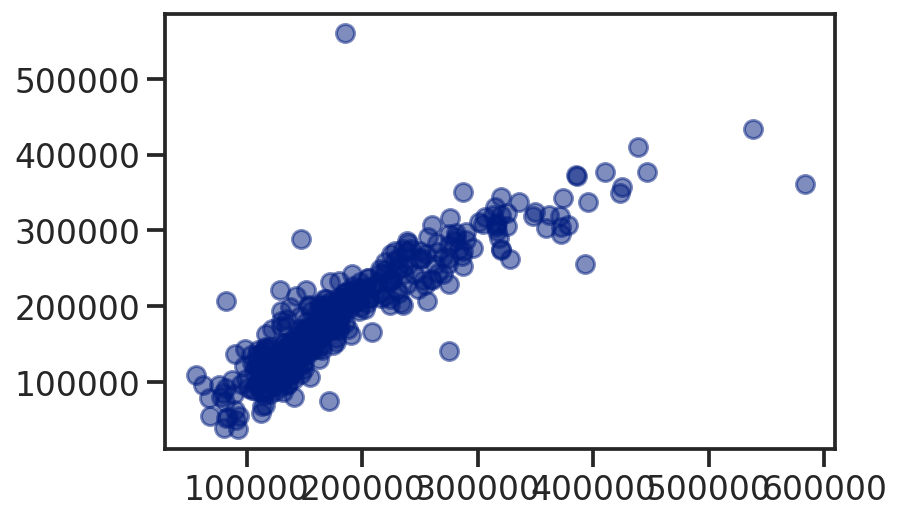

In [31]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = plt.axes()
ax.scatter(y_test, y_test_pred, alpha=0.5)

#**Cross Validation:**

1/ Chain Mulitiple data processing steps together using Pepline function which allows us to speed up the workflow.

2/ Using kfolds object to split up the data into multiples folds.

3/ perform cross-validation using sklearn cross_val_predict & GridSearchCV.



In [32]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

In [39]:
# Kfolds tells us the cross valiadatio how to split up the data: 
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [40]:
for train_index, test_index in kf.split(x_data):
  print('Train inex:', train_index[:10], len(train_index))
  print('test inex:', test_index[:10], len(test_index))
  print('')

Train inex: [ 0  2  4  5  6  7  8 10 11 12] 919
test inex: [ 1  3  9 16 17 24 26 27 30 33] 460

Train inex: [ 1  3  8  9 10 11 13 14 16 17] 919
test inex: [ 0  2  4  5  6  7 12 15 20 23] 460

Train inex: [ 0  1  2  3  4  5  6  7  9 12] 920
test inex: [ 8 10 11 13 14 18 19 21 22 28] 459



In [42]:
scores = []
lr = LinearRegression()
for train_index, test_index in kf.split(x_data):
  x_train, x_test, y_train, y_test = (x_data.iloc[train_index, :],
                                      x_data.iloc[test_index,:],
                                      y_data[train_index],
                                      y_data[test_index])
  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  score = r2_score(y_test, y_pred)
  scores.append(score)

scores  

[0.8276298196712377, 0.7332863782908077, 0.7935196178609187]

In [43]:
scores = []
lr = LinearRegression()
s = StandardScaler()
for train_index, test_index in kf.split(x_data):
  x_train, x_test, y_train, y_test = (x_data.iloc[train_index, :],
                                      x_data.iloc[test_index,:],
                                      y_data[train_index],
                                      y_data[test_index])
  x_train_s = s.fit_transform(x_train)
  lr.fit(x_train_s, y_train)
  x_test_s = s.fit_transform(x_test)
  y_pred = lr.predict(x_test_s)
  score = r2_score(y_test, y_pred)
  scores.append(score)

scores  



[0.8239446060147971, 0.7319958587601824, 0.7922706647692423]

#**Compaine Mutiple processing steps into Pipeline:**

In [44]:
estimator = Pipeline([('Scaler', s),('Regression', lr)])

In [45]:
estimator.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [46]:
estimator.predict(x_test)

array([192310.14885847, 114401.96818948, 338440.43564187, 236125.62686804,
       150669.58960818, 147779.43444846, 125006.10942795, 137127.83907903,
       259328.34367485, 194649.21970317,  56180.15481511, 270187.18230425,
       290600.1768345 , 130050.78067948, 174582.79505469, 370457.43639606,
       118562.66059039, 203045.263136  , 169825.83993273, 183436.49368914,
       231021.82897731, 120773.80721114, 220593.96711251, 131308.59453081,
       207625.5824192 , 176618.38674507, 139609.38207841, 134756.65874289,
       182908.96515277, 198308.86385077, 192468.63471588, 112150.74242793,
       197893.63153772, 217674.01781954, 164153.46717689, 319974.88784911,
       142707.98233944, 150192.32728425, 123705.88037713, 130693.48218345,
       219654.91561574, 224696.1739271 , 179483.55801786, 108631.93750686,
       290378.18117831, 374312.87795626, 221013.69371924, 205593.53155362,
       305684.03073143, 178242.28289094, 228348.79782335, 117695.42511099,
       166109.88078192, 1

#**Cross_val_predict:**

In [48]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [49]:
predictions = cross_val_predict(estimator, x_data, y_data)

In [50]:
predictions

array([228879.64550479, 199085.37565021, 221226.54585815, ...,
       234200.1170094 , 127980.76059799, 148582.86649351])

In [51]:
r2_score(y_data, predictions)

0.7831011764935755

In [53]:
np.mean(scores)

0.7827370431814072

#**Hyperparmeter Tuning:**

In [54]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [55]:
scores = []
coefs = []

In [60]:
for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=10000)
  estimator = Pipeline([('Scaler', s), ('lasso_regrssion', las)])
  predictions = cross_val_predict(estimator, x_data, y_data, cv=kf)
  score = r2_score(y_data, predictions)
  scores.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215330281793.33148, tolerance: 589798902.7702838
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208129198109.36407, tolerance: 557472645.588279
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245022957416.86578, tolerance: 573580033.6402674
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2149374232

In [61]:
list(zip(alphas, scores))

[(1e-09, 0.7831309631117954),
 (1e-08, 0.7831309631118313),
 (1e-07, 0.7831309631120351),
 (1e-06, 0.7831309631142345),
 (1e-05, 0.7831309631361278),
 (0.0001, 0.7831309633551169),
 (0.001, 0.7831309655449478),
 (0.01, 0.7831309874414792),
 (0.1, 0.7831314337913748),
 (1.0, 0.7831351596109964)]

In [62]:
Lasso(alpha=1e-6).fit(x_data, y_data).coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614689451204.8982, tolerance: 860530034.3448575
  positive)


array([ 6.20109554e+01,  6.23215857e+01,  2.11774725e+01, -1.00174425e+04,
        4.91163459e+01,  3.97630590e+01,  8.11809562e+03,  1.68342490e+03,
        3.80418604e+01,  1.06871697e+01,  3.58145634e+03,  2.28207092e+03,
        6.95146196e+00,  1.59519110e+04, -6.50218777e+01, -1.34467678e+01,
       -2.84966553e+03, -2.15478683e+04,  4.87622621e-01, -1.07955775e+02,
        4.51243778e+01, -1.91773092e+02,  2.75006510e+01, -5.62981522e-01,
       -5.79616969e+01, -7.43826634e-01,  5.48998806e+03,  1.83281484e+04,
       -3.04196832e+01,  5.31998827e+01,  5.37629395e+03, -3.12099869e+01,
        2.49968435e+01,  3.70825555e+02,  9.99007191e+01, -6.79559883e+02])

In [68]:
# Add Polynomial Features to this pipeline: 
pf = PolynomialFeatures(degree=3)

In [70]:
scores = []
alphas = np.geomspace(0.001, 10, 5)
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [72]:
for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=1000)
  estimator = Pipeline([('Make_higher_degree', pf),
                        ('Scaler', s),
                        ('Lass_regression', las)])
  predictions = cross_val_predict(estimator, x_data, y_data, cv=kf)
  score = r2_score(y_data, predictions)
  scores.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6977752106.051406, tolerance: 589798902.7702838
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6153573133.943399, tolerance: 557472645.588279
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6022707252.909113, tolerance: 573580033.6402674
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7083409429.20

In [73]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [74]:
scores

[-1.081585434240524,
 -1.0671174298791137,
 -0.9477237020791633,
 -1.1528355422993504,
 -0.2772679590079039]

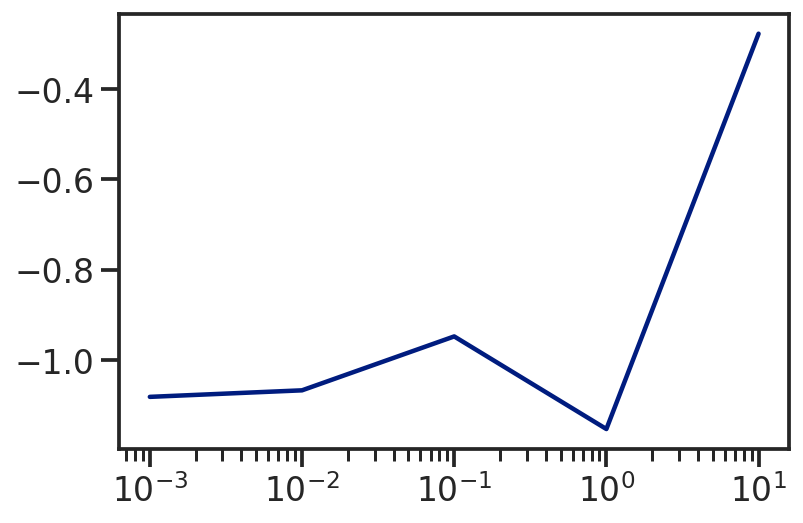

In [79]:
plt.semilogx(alphas, scores);